<h1>Maspex - Task 2 - PART 1</h1>
<hr>
<b>Exploratory data analysis dataset.csv</b><br/>
Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.


<h4> Data Fields</h4>
<ul>
    <li>datetime - hourly date + timestamp </li>
    <li>season - 1 = spring, 2 = summer, 3 = fall, 4 = winter </li>
    <li>holiday - whether the day is considered a holiday </li>
    <li>workingday - whether the day is neither a weekend nor holiday </li>
    <li>weather -
        <ul>
        <li>1: Clear, Few clouds, Partly cloudy, Partly cloudy</li>
        <li>2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist</li>
        <li>3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds</li>
        <li>4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog</li>
        </ul>
     </li>
    <li>temp  - temperature in Celsius</li>
    <li>atemp  - "feels like" temperature in Celsius</li>
    <li>humidity  - relative humidity</li>
    <li>windspeed - wind speed</li> 
    <li>casual  - number of non-registered user rentals initiated</li>
    <li>registered  - number of registered user rentals initiated</li>
    <li>count  - number of total rentals (Dependent Variable)</li>
 </ul>   
 

 

 <h3>Problem Discussion</h3><br>
Our dataset is  a tabular dataset with numerical and categorical features. We will probably encounter non-linear relationships between variables and the target count column. The model that may be convinient for this type of regression is probably Random Forest regressor. Linear regressor would probably fail to do accurate predictions if we have categorical variables as inputs.

In [11]:
import sys
!{sys.executable} -m pip install --upgrade pip

Requirement already up-to-date: pip in c:\users\wisniewskit\desktop\trening\python_training\python_2020\maspex_project\maspex\maspex_venv\lib\site-packages (20.2.4)


In [12]:
#standard library imports
from pathlib import Path
from itertools import cycle, islice, combinations


#third party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import matplotlib.pylab as pylab

<b> First exploratory data analysis  of dataset
</b>

In [13]:
train_df = pd.read_csv(r"../data/train.csv",parse_dates=["datetime"])
train_df_initial = train_df.copy()
test_df = pd.read_csv(r"../data/test.csv",parse_dates=["datetime"])

In [14]:
train_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


Identify Anomalies/ Missing Data

In [16]:
train_df.isna().sum() # checking whether or not we have rows with nan values

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [17]:
train_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [18]:
min(train_df["datetime"])

Timestamp('2011-01-01 00:00:00')

In [19]:
max(train_df["datetime"])

Timestamp('2012-12-19 23:00:00')

In [20]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 16,
         'axes.titlesize':20,
         'xtick.labelsize':14,
         'ytick.labelsize':14}
pylab.rcParams.update(params)
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, 30))
kwargs = {"color":my_colors}

<AxesSubplot:>

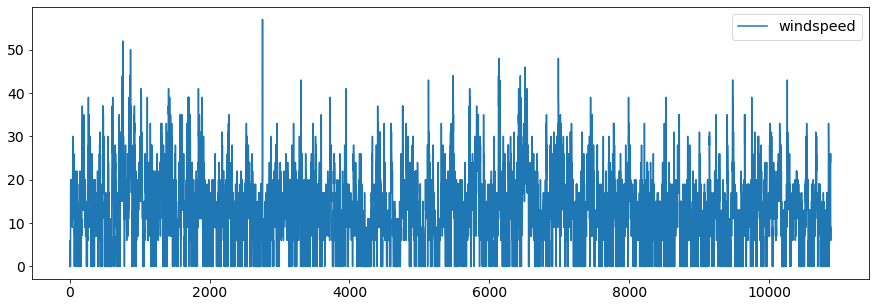

In [21]:
train_df["windspeed"].plot(legend=True)

<AxesSubplot:>

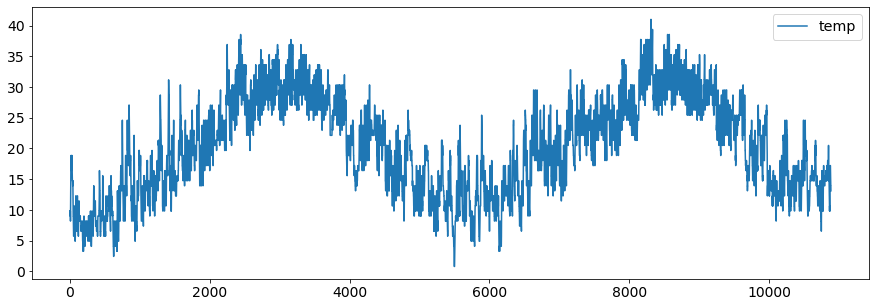

In [22]:
train_df["temp"].plot(legend=True)

<AxesSubplot:>

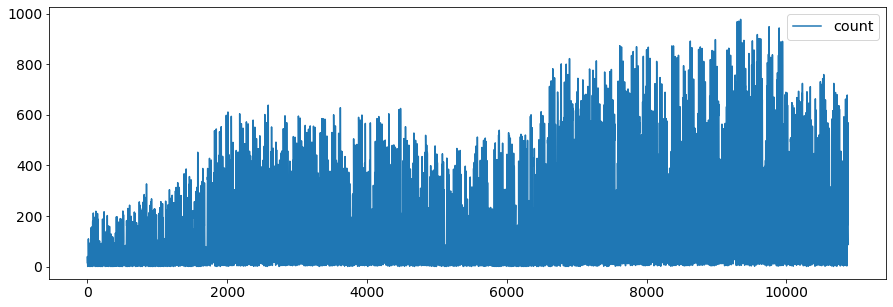

In [23]:
train_df["count"].plot(legend=True)

C:\Users\wisniewskit\Desktop\Trening\Python_training\Python_2020\maspex_project\maspex\maspex_venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

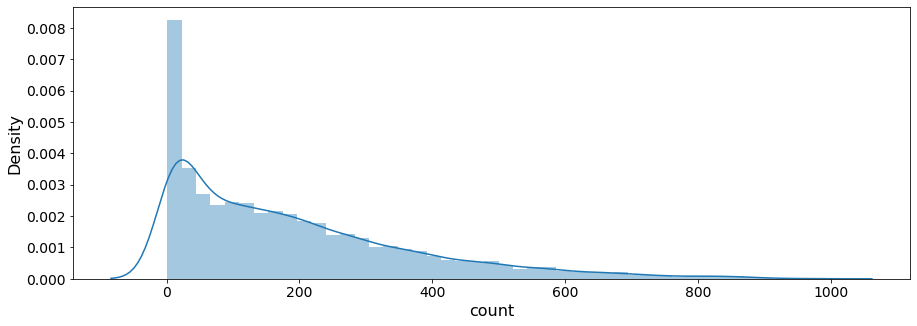

In [24]:
sns.distplot(train_df['count'])

<h3>Discussion about initial Exploratory data analyses (EDA)</h3><br>
This first dataset exploration allows to notice that we have several categorical features:
<ul>
    <li>season</li>
    <li>holiday</li>
    <li>workingday</li>
    <li>weather</li>
</ul>
These variables need to be transformed into category pandas datatype. Furthermore, the datetime column can give us additional data about days of a week, month and hour. In the figure presenting temp column, we can observe seasonality of temperature. The count column is highly skewed. Thus, the log transformation is going to be applied to the target count column. 

<br>
<h3>Feature Engineering</h3>
<br>

In [25]:
train_df["dayofweek"] = train_df["datetime"].dt.dayofweek

In [26]:
train_df["month"] = train_df["datetime"].dt.month

In [27]:
train_df["hour"] = train_df["datetime"].dt.hour

In [28]:
def get_season(value):
    if value == 1:
        return "spring"
    elif value == 2:
        return "summer"
    elif value == 3:
        return "fall"  
    return "winter"

In [29]:
train_df["season"] = train_df["season"].apply(get_season)

In [30]:
def get_weather(value):
    if value == 1:
        return "Clear, Few clouds, Partly cloudy, Partly cloudy"
    elif value == 2:
        return "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
    elif value == 3:
        return "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds"  
    return "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"

In [31]:
train_df["weather"] = train_df["weather"].apply(get_weather)

In [32]:
datetime_ser  = train_df.drop(["datetime"],axis=1)
train_df = train_df.drop(["datetime"],axis=1)

In [33]:
train_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dayofweek,month,hour
0,spring,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,81,0.0,3,13,16,5,1,0
1,spring,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,13.635,80,0.0,8,32,40,5,1,1
2,spring,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,13.635,80,0.0,5,27,32,5,1,2
3,spring,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,75,0.0,3,10,13,5,1,3
4,spring,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,75,0.0,0,1,1,5,1,4


In [34]:
category_cols_names = ["season","weather","holiday","workingday","hour","dayofweek","month"]
for var in category_cols_names:
    train_df[var] = train_df[var].astype("category")

<br>
<h4>Correlation matrix and analyses</h4>
<br>

<AxesSubplot:>

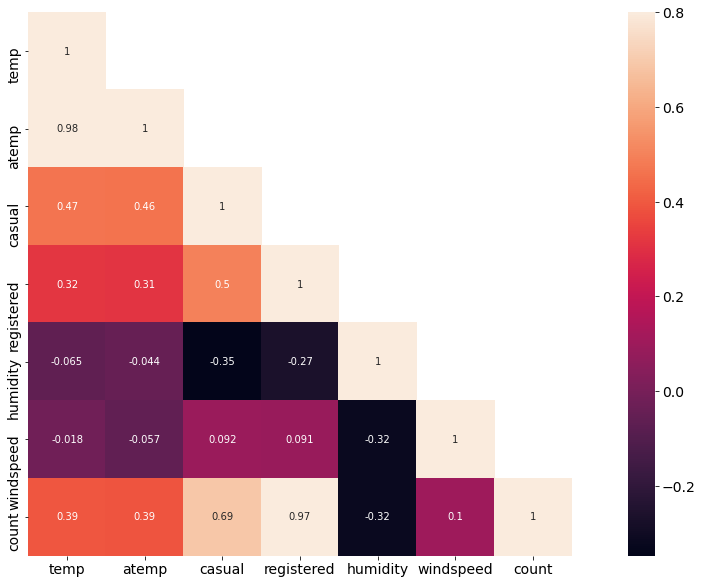

In [35]:
cols_numerical = ["temp","atemp","casual","registered","humidity","windspeed","count"]


corrMatt = train_df[cols_numerical].corr()
# Generate a mask for the upper triangle
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [36]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [37]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(train_df[cols_numerical], 15))

Top Absolute Correlations
temp        atemp         0.984948
registered  count         0.970948
casual      count         0.690414
            registered    0.497250
temp        casual        0.467097
atemp       casual        0.462067
temp        count         0.394454
atemp       count         0.389784
casual      humidity      0.348187
humidity    windspeed     0.318607
temp        registered    0.318571
humidity    count         0.317371
atemp       registered    0.314635
registered  humidity      0.265458
windspeed   count         0.101369
dtype: float64


The relationship between temp col and a temp column is very strong. It allows us to reduce the dimensionality of the dataset by dropping atemp column without loosing too much information for our forecasting task.

In [38]:
train_df = train_df.drop("atemp", axis=1)

We are going to carry log transformation on the target column, because most models performs better with normally distributed dependent variable.

C:\Users\wisniewskit\Desktop\Trening\Python_training\Python_2020\maspex_project\maspex\maspex_venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

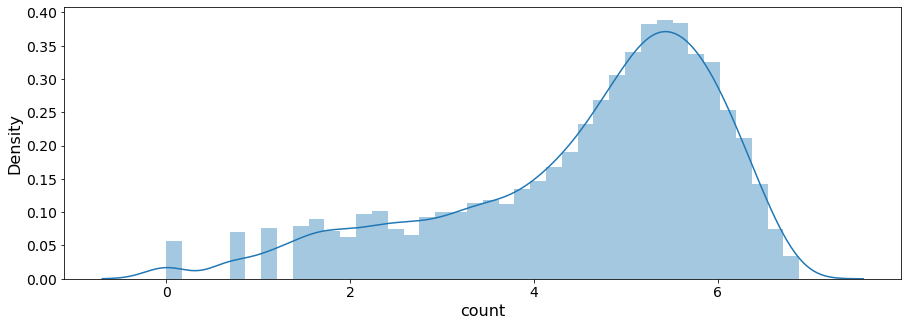

In [39]:
sns.distplot(train_df["count"].apply(np.log))

The target column values are still far from being normally distributed, but we can notice an improvement regarding this metric.

In [40]:
def plot_comparison_relative(data: pd.DataFrame, comparison_column:str, rotation:int = 0):
    """
        This funciton allows to plot a count plot, which is not 
        currently possible with the current barplot function of seaborn library.
    """
    
    a4_dims = (12, 5)
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.countplot(ax =ax, x=comparison_column, data=data)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=rotation)

In [41]:
def plot_comparison(data: pd.DataFrame, comparison_column:str, aggregation_col:str, rotation:float = 0):
    """
        plotting with grouping of the target column
    """
    kwargs = { "color":my_colors}
    a4_dims = (12, 5)
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.barplot(x=aggregation_col,y='count',data=data)
    ax.set_ylabel("mean " + comparison_column)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=rotation)

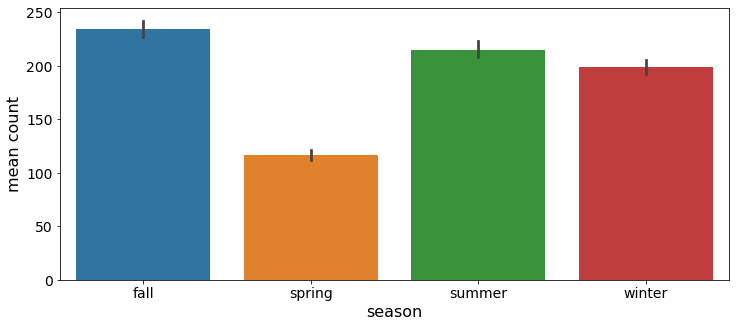

In [42]:
plot_comparison(train_df,"count", "season", rotation = 0)

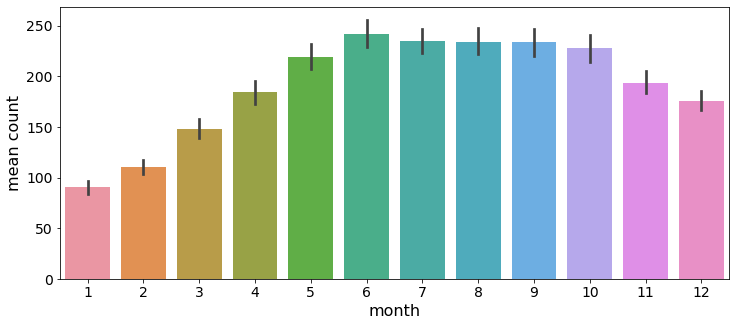

In [43]:
plot_comparison(train_df,"count", "month", rotation = 0)

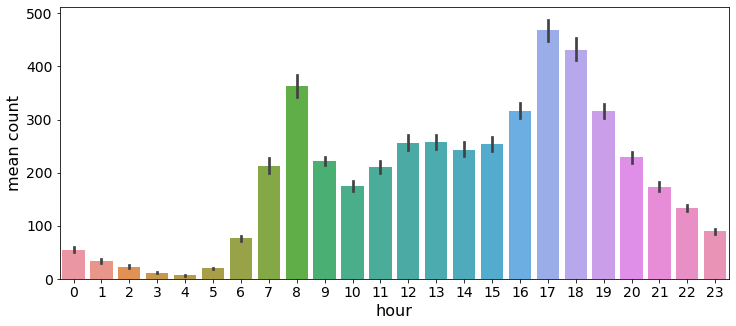

In [44]:
plot_comparison(train_df,"count", "hour", rotation = 0)

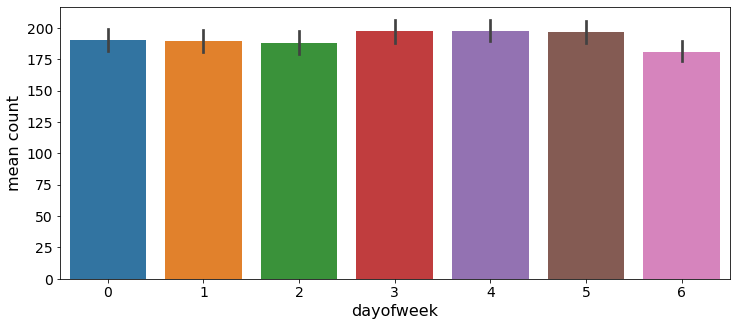

In [45]:
plot_comparison(train_df,"count", "dayofweek", rotation = 0)

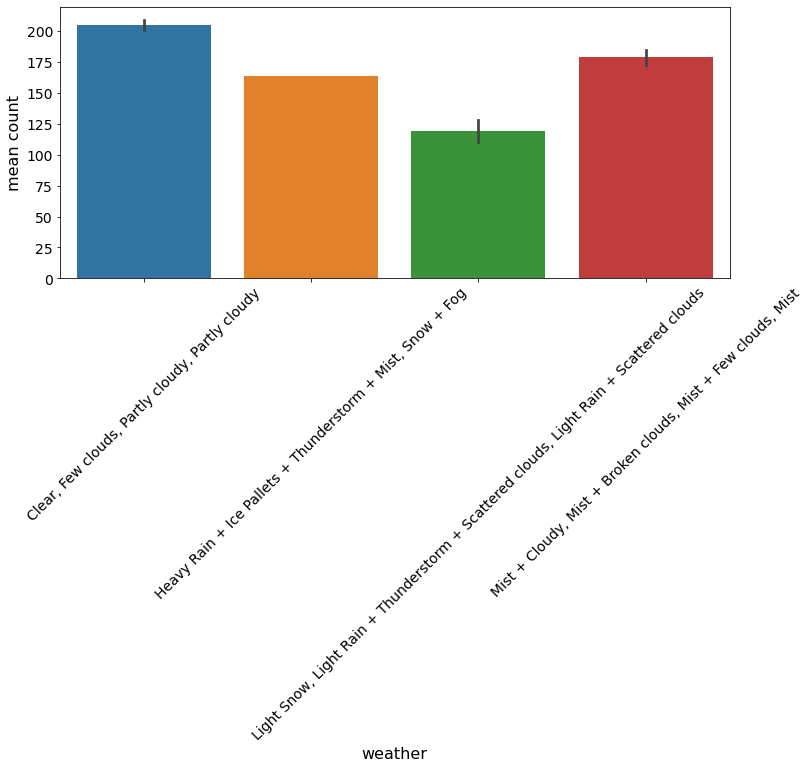

In [46]:
plot_comparison(train_df,"count", "weather", rotation = 45)

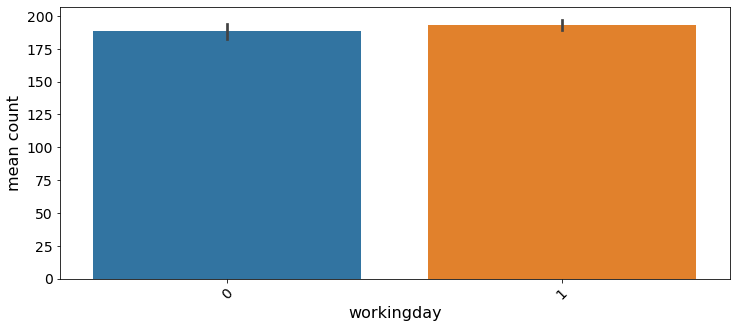

In [47]:
plot_comparison(train_df,"count", "workingday", rotation = 45)

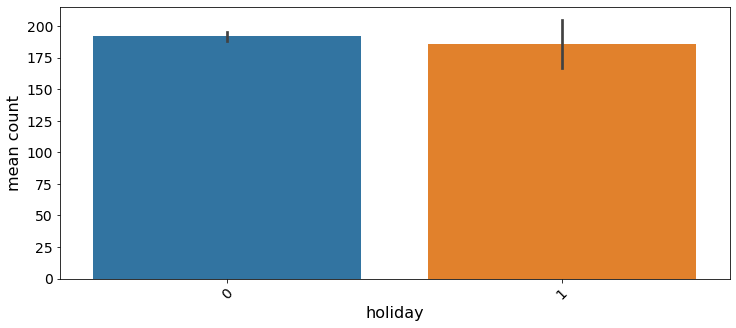

In [48]:
plot_comparison(train_df,"count", "holiday", rotation = 45)

In [49]:
train_df.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,dayofweek,month,hour
0,spring,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,81,0.0,3,13,16,5,1,0
1,spring,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,80,0.0,8,32,40,5,1,1
2,spring,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,80,0.0,5,27,32,5,1,2
3,spring,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,75,0.0,3,10,13,5,1,3
4,spring,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,75,0.0,0,1,1,5,1,4


We have to drop register and We have to drop register and 'casual' as they are so called leakage variables. During the prediction phase, we are not going to have this type of variables at our disposal.